#*Load Data*

In [ ]:
# Tulis Program Anda Disini!

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
# masuk ke directory penyimpanan dataset anda
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
!ls

 AppleDataset				 model2modul5.h5
 apple-plant-diseases-dataset.zip	 model2modul5.tflite
 cell-images-for-detecting-malaria.zip	'new plant diseases dataset(augmented)'
 flowers-recognition.zip		'New Plant Diseases Dataset(Augmented)'
 kaggle.json				 new-plant-diseases-dataset.zip
 logs					 SplitingFlowers
 Malaria				 test
 Malaria2				 x_test.npy
 model1.h5				 x_train.npy
 model1.json				 x_val.npy
 model1modul5.h5			 y_test.npy
 model1modul5.tflite			 y_train.npy
 model2.h5				 y_val.npy
 model2.json


In [ ]:
# Ekstrak file dataset dan hapus file zip dataset agar tidak memakan banyak tempat.
import os
import zipfile

local_zip = 'apple-plant-diseases-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content') #mengeksrak file zip ke direktory yang sudah ditentukan
zip_ref.close()

#*Splitting* Train 80%, Val 19%, Train 1%

In [ ]:
!pip install split-folders

import splitfolders

In [ ]:
base_dir = '/content/apple-plant-diseases-dataset'

In [ ]:
splitfolders.ratio(base_dir, 
                   output='AppleDataset', 
                   seed=1337, 
                   ratio=(.8, .19, .01),
                   group_prefix=None
                   )

Copying files: 9721 files [01:33, 104.43 files/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             horizontal_flip=True,
                             width_shift_range =1,
                             height_shift_range = 1,
                             shear_range = 0.2,
                             fill_mode = 'nearest')

In [ ]:
input_shape = (250, 250)

train = '/content/drive/MyDrive/kaggle/AppleDataset/train'
train_generator = datagen.flow_from_directory(train,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)
validation = '/content/drive/MyDrive/kaggle/AppleDataset/val'
validation_generator = datagen.flow_from_directory(validation,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

test = '/content/drive/MyDrive/kaggle/AppleDataset/test'
test_generator = datagen.flow_from_directory(test,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

Found 7776 images belonging to 4 classes.
Found 1844 images belonging to 4 classes.
Found 101 images belonging to 4 classes.


#*MODELING*

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, InputLayer, AveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
rgb = (3, )
shape = input_shape+rgb
dropout = 0.05
lr = 0.001
adam = Adam(learning_rate=lr)
los = 'categorical_crossentropy'
max_epoch = 100

In [ ]:
model1 = Sequential()

model1.add(InputLayer(input_shape=shape))
model1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=2, padding='same'))
model1.add(Flatten())

# Fully Connected Layer
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(dropout))
model1.add(Dense(4, activation='softmax'))

# Print model summary
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 128)     3584      
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 128)    512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      73792     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model1.compile(optimizer=adam, loss=los, metrics=['acc'])

In [ ]:
H1 = model1.fit(train_generator,
                steps_per_epoch = 32,
                epochs= max_epoch, 
                validation_data = validation_generator)

Epoch 1/100
32/32 [==============================] - 579s 18s/step - loss: 3.6721 - acc: 0.4453 - val_loss: 7.2561 - val_acc: 0.2115
Epoch 2/100
32/32 [==============================] - 154s 5s/step - loss: 1.6879 - acc: 0.4932 - val_loss: 11.2367 - val_acc: 0.2267
Epoch 3/100
32/32 [==============================] - 157s 5s/step - loss: 1.0208 - acc: 0.6465 - val_loss: 4.5414 - val_acc: 0.2880
Epoch 4/100
32/32 [==============================] - 166s 5s/step - loss: 0.9557 - acc: 0.6768 - val_loss: 4.9823 - val_acc: 0.2148
Epoch 5/100
32/32 [==============================] - 134s 4s/step - loss: 0.7086 - acc: 0.7100 - val_loss: 5.9340 - val_acc: 0.3010
Epoch 6/100
32/32 [==============================] - 119s 4s/step - loss: 0.5248 - acc: 0.8096 - val_loss: 4.9943 - val_acc: 0.3113
Epoch 7/100
32/32 [==============================] - 129s 4s/step - loss: 0.5567 - acc: 0.8281 - val_loss: 5.8768 - val_acc: 0.3129
Epoch 8/100
32/32 [==============================] - 122s 4s/step - loss: 

In [ ]:
model1.save("model1.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model1.to_json()
with open("model1.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
import tensorflow as tf
# Convert the model 1
converter = tf.lite.TFLiteConverter.from_keras_model(model1)
tflite_model1 = converter.convert()

# Save the model 1.
with open('model1modul5kelompok.tflite', 'wb') as f:
  f.write(tflite_model1)

INFO:tensorflow:Assets written to: /tmp/tmpwbxgonh6/assets


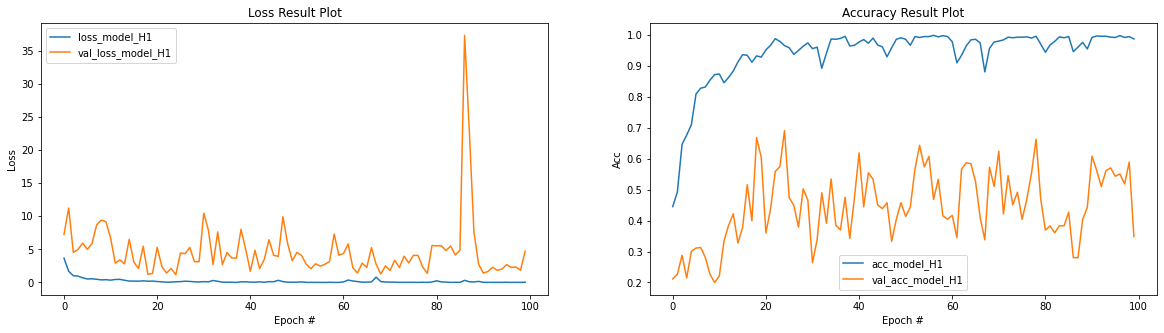

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)

ax1.plot(np.arange(0, 100), H1.history["loss"], label="loss_model_H1")
ax1.plot(np.arange(0, 100), H1.history["val_loss"], label="val_loss_model_H1")
ax1.set_title("Loss Result Plot")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(np.arange(0, 100), H1.history["acc"], label="acc_model_H1")
ax2.plot(np.arange(0, 100), H1.history["val_acc"], label="val_acc_model_H1")
ax2.set_title("Accuracy Result Plot")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Acc")
ax2.legend()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

ypred = model1.predict(test_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.28      1.00      0.44        26
           1       0.00      0.00      0.00        26
           2       0.89      0.35      0.50        23
           3       0.00      0.00      0.00        26

    accuracy                           0.34       101
   macro avg       0.29      0.34      0.24       101
weighted avg       0.28      0.34      0.23       101



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 33.66%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


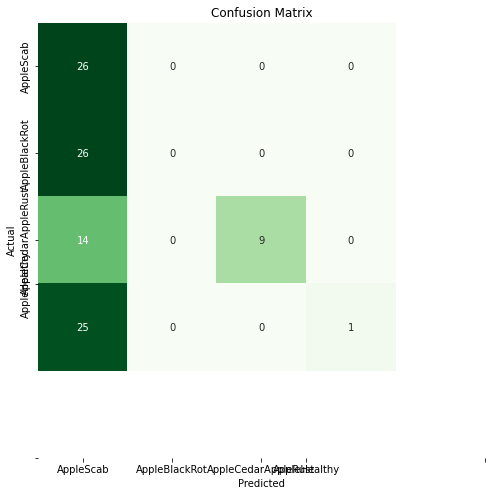

Classification Report:
----------------------
                      precision    recall  f1-score   support

          AppleScab       0.29      1.00      0.44        26
      AppleBlackRot       0.00      0.00      0.00        26
AppleCedarAppleRust       1.00      0.39      0.56        23
       AppleHealthy       1.00      0.04      0.07        26

           accuracy                           0.36       101
          macro avg       0.57      0.36      0.27       101
       weighted avg       0.56      0.36      0.26       101



In [ ]:
import seaborn as sns

acc = model1.evaluate(test_generator, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

predictions = np.argmax(model1.predict(test_generator), axis=1)

cm = confusion_matrix(test_generator.labels, predictions, labels=[0, 1, 2, 3])
clr = classification_report(test_generator.labels, predictions, labels=[0, 1, 2, 3], target_names=["AppleScab", "AppleBlackRot", "AppleCedarAppleRust", "AppleHealthy"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3,5], labels=["AppleScab", "AppleBlackRot", "AppleCedarAppleRust", "AppleHealthy"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3,5], labels=["AppleScab", "AppleBlackRot", "AppleCedarAppleRust", "AppleHealthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
model2 = Sequential()

model2.add(InputLayer(input_shape=shape))
model2.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
#model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
#model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
#model2.add(BatchNormalization())
model2.add(AveragePooling2D(pool_size=2, padding='same'))
model2.add(Dropout(0.2))
model2.add(Flatten())

# Fully Connected Layer
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
#model2.add(Dropout(dropout))
model2.add(Dense(4, activation='softmax'))

# Print model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 250, 250, 256)     7168      
                                                                 
 average_pooling2d (AverageP  (None, 125, 125, 256)    0         
 ooling2D)                                                       
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 128)     295040    
                                                                 
 average_pooling2d_1 (Averag  (None, 63, 63, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)        73792     
                                                                 
 average_pooling2d_2 (Averag  (None, 32, 32, 64)      

In [ ]:
lr = 0.0015
adamm = Adam(learning_rate=lr)

In [ ]:
model2.compile(optimizer=adamm, loss=los, metrics=['acc'])

In [ ]:
NN = model2.fit(train_generator,
                steps_per_epoch = 32, 
                epochs= max_epoch, 
                validation_data=validation_generator)

Epoch 1/100
32/32 [==============================] - 96s 3s/step - loss: 2.0110 - acc: 0.0879 - val_loss: 1.3860 - val_acc: 0.2554
Epoch 2/100
32/32 [==============================] - 64s 2s/step - loss: 1.3674 - acc: 0.3057 - val_loss: 1.3416 - val_acc: 0.2554
Epoch 3/100
32/32 [==============================] - 62s 2s/step - loss: 1.3998 - acc: 0.1006 - val_loss: 1.3736 - val_acc: 0.3145
Epoch 4/100
32/32 [==============================] - 61s 2s/step - loss: 1.3693 - acc: 0.1787 - val_loss: 1.3438 - val_acc: 0.2522
Epoch 5/100
32/32 [==============================] - 61s 2s/step - loss: 1.3209 - acc: 0.3447 - val_loss: 1.3033 - val_acc: 0.4371
Epoch 6/100
32/32 [==============================] - 62s 2s/step - loss: 1.2844 - acc: 0.5195 - val_loss: 2.3210 - val_acc: 0.3021
Epoch 7/100
32/32 [==============================] - 62s 2s/step - loss: 1.4763 - acc: 0.4199 - val_loss: 1.3001 - val_acc: 0.4252
Epoch 8/100
32/32 [==============================] - 62s 2s/step - loss: 1.4586 - a

In [ ]:
model1.save("model2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
# Convert the model 2
converter = tf.lite.TFLiteConverter.from_keras_model(model2)
tflite_model2 = converter.convert()

# Save the model 2
with open('model2modul5kelompok.tflite', 'wb') as f:
  f.write(tflite_model2)

INFO:tensorflow:Assets written to: /tmp/tmpf1_7bo47/assets


INFO:tensorflow:Assets written to: /tmp/tmpf1_7bo47/assets


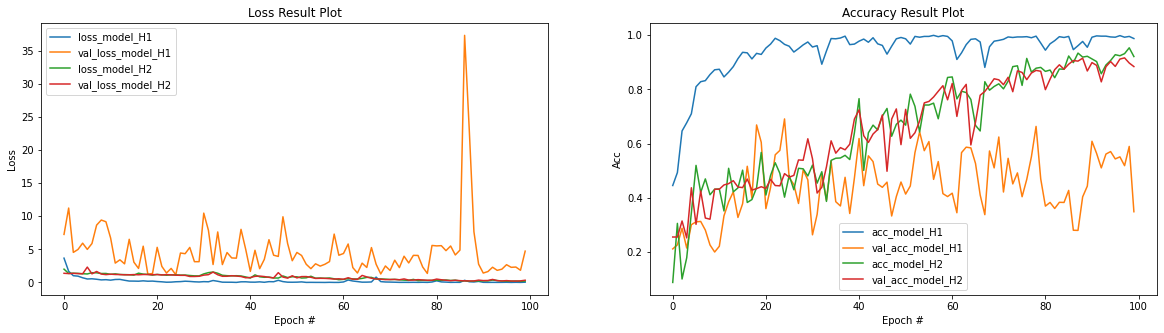

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)

ax1.plot(np.arange(0, 100), H1.history["loss"], label="loss_model_H1")
ax1.plot(np.arange(0, 100), H1.history["val_loss"], label="val_loss_model_H1")
ax1.plot(np.arange(0, 100), NN.history["loss"], label="loss_model_H2")
ax1.plot(np.arange(0, 100), NN.history["val_loss"], label="val_loss_model_H2")
ax1.set_title("Loss Result Plot")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(np.arange(0, 100), H1.history["acc"], label="acc_model_H1")
ax2.plot(np.arange(0, 100), H1.history["val_acc"], label="val_acc_model_H1")
ax2.plot(np.arange(0, 100), NN.history["acc"], label="acc_model_H2")
ax2.plot(np.arange(0, 100), NN.history["val_acc"], label="val_acc_model_H2")
ax2.set_title("Accuracy Result Plot")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Acc")
ax2.legend()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

ypred = model2.predict(test_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(test_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85        26
           1       0.96      1.00      0.98        26
           2       0.92      0.96      0.94        23
           3       0.90      1.00      0.95        26

    accuracy                           0.93       101
   macro avg       0.93      0.93      0.93       101
weighted avg       0.93      0.93      0.93       101



Accuracy: 89.11%


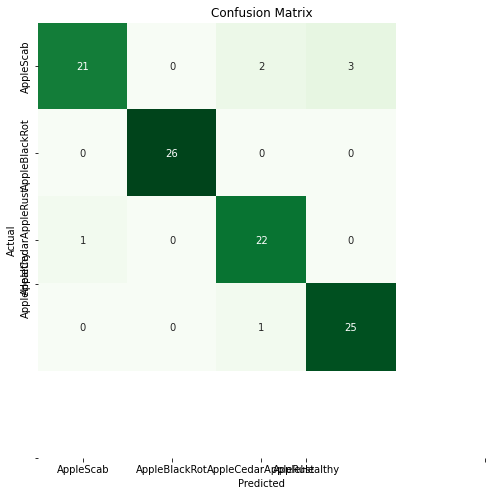

Classification Report:
----------------------
                      precision    recall  f1-score   support

          AppleScab       0.95      0.81      0.88        26
      AppleBlackRot       1.00      1.00      1.00        26
AppleCedarAppleRust       0.88      0.96      0.92        23
       AppleHealthy       0.89      0.96      0.93        26

           accuracy                           0.93       101
          macro avg       0.93      0.93      0.93       101
       weighted avg       0.93      0.93      0.93       101



In [ ]:
import seaborn as sns

acc = model2.evaluate(test_generator, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

predictions = np.argmax(model2.predict(test_generator), axis=1)

cm = confusion_matrix(test_generator.labels, predictions, labels=[0, 1, 2, 3])
clr = classification_report(test_generator.labels, predictions, labels=[0, 1, 2, 3], target_names=["AppleScab", "AppleBlackRot", "AppleCedarAppleRust", "AppleHealthy"])

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3,5], labels=["AppleScab", "AppleBlackRot", "AppleCedarAppleRust", "AppleHealthy"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3,5], labels=["AppleScab", "AppleBlackRot", "AppleCedarAppleRust", "AppleHealthy"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)